$ pip install pillow opencv-python matplotlib    

### 1. 디지털 이미지
디지털 화면은 수 많은 점들로 이루어져 있으며, 색상을 가지는 점 하나를 화소(pixel, picture element)라고 합니다. 각 화소는 RGB(Red, Green, Blue) 세 개의 단일 색의 강도를 각각 조절하여 색상을 표현합니다. 이는 눈의 망막에 있는 시세포가 인간의 경우 대부분 세 가지로 이루어져 있기 때문입니다. 

각 점 하나하나의 색상 값을 저장하는 방식은 래스터(raster) 또는 비트맵(bitmap) 방식의 이미지라고 하며, 보통 한 점마다 각 색상 별로 8비트를 사용하여 0~255 사이의 값(2^8 = 256)으로 해당 색의 감도를 표시합니다.

반면에 벡터(vector) 방식의 이미지는 상대적인 점과 선의 위치를 방정식으로써 기록해 두었다가, 확대 및 축소에 따라 디지털 화면의 각 화소에 어떻게 표현될지를 재계산하기에 깨짐이 없습니다. 우리가 주로 다루는 파일들 중에는 사진 파일들이 래스터 방식이며, 확대 축소가 자유로이 가능한 글꼴들이 주로 벡터 방식입니다.

디지털 화면에서 색감을 수치적으로 조작할 때 조금 더 직관적으로 이해할 수 있는 HSV(Hue 색상, Saturation 채도, Value 명도)도 자주 사용됩니다. 이외에 인쇄 매체의 경우에는 색의 강도를 높일 수록 어두워진다는 특성과, 또한 자주 사용되는 검정색을 표현할 때 각 색을 조합하면 잉크의 낭비가 심하다는 현실적인 이유 때문에, RGB가 아닌 CMYK(Cyan, Magenta, Yellow, Black) 네 가지 색상을 사용합니다.
 
이렇게 색을 표현하는 다양한 방식을 각각 컬러 스페이스(color space, 색 공간)라고 하며, 각 컬러 스페이스를 구성하는 단일 축(RGB에서의 각각 R, G, B)을 채널(channel)이라고 합니다.

하지만 이러한 색상 정보를 그대로 저장하기에는 생각보다 많은 용량을 차지합니다. 따라서 사진 저장에 흔히 쓰이는 JPEG 이미지 형식의 경우 근처에 있는 화소들을 묶어, 비슷한 색들을 뭉뚱그리는 방식으로 이미지를 압축합니다.

이러한 방식에는 색상 정보의 손실이 있기에, 저장할 때 압축률을 높이거나, 여러번 다시 저장하는 등 재압축이 일어나게 될 경우, 흔히 디지털 풍화라고 불리는 색상이 지저분해지는 현상을 볼 수 있습니다.

PNG 이미지 형식의 경우 색상의 손실 없이 이미지를 압축하는데, 이미지에 사용된 색상을 미리 정의해두고 그를 참조하는 팔렛트 방식을 사용할 수 있기에, 사용된 색상이 적은 단순한 이미지의 경우 동일한 해상도의 JPEG 파일보다도 용량이 작을 수 있지만, 사진과 같이 이미지에 사용된 색상이 많아지면 JPEG 파일보다 쉽게 더 많은 용량을 차지합니다. 

GIF 형식의 이미지는 이미지 내에 여러 프레임을 두어 이를 움직이게 만들 수 있고, 또한 색상 정보를 손실 없이 저장하나, 256개의 색상만 기억할 수 있는 팔렛트 방식으로 제한됩니다.

### 2. Pillow 사용법
간단한 이미지 작업에 Pillow는 Numpy와 결합하여 간편하게 사용할 수 있는 도구이다.

이미지는 배열 형태의 데이터이다.

In [1]:
import numpy as np
from PIL import Image

data = np.zeros([32, 32, 3], dtype=np.uint8)
image = Image.fromarray(data, 'RGB')
image.show()

In [2]:
data[:, :] = [255, 0, 0]
image = Image.fromarray(data, 'RGB')
image.show()

In [ ]:
data = np.zeros([128, 128, 3], dtype=np.uint8)
data[:, :] = [255, 255, 255]
image = Image.fromarray(data, 'RGB')
image.show()

In [4]:
from PIL import Image
import os

# 연습용 파일 경로
image_path = os.getenv('HOME')+'/workplace/aiffel/Fundamentals/36.python_image_proc/pillow_practice.png'

# 이미지 열기
img = Image.open(image_path)
img.show()

# width와 height 출력
print(img.width)
print(img.height)

# JPG 파일 형식으로 저장해보기
new_image_path = os.getenv('HOME')+'/workplace/aiffel/Fundamentals/36.python_image_proc/pillow_practice.jpg'
img = img.convert('RGB')
img.save(new_image_path)

620
465


In [5]:
resized_image = img.resize((100,200))
resized_image.show()

resized_image_path = os.getenv('HOME')+'/workplace/aiffel/Fundamentals/36.python_image_proc/pillow_practice_resized.png'
resized_image.save(resized_image_path)

In [6]:
# crop()를 이용하여 눈 부분만 잘라내어 저장
box = (300, 100, 600, 400)
region = img.crop(box)
region.show()

cropped_image_path = os.getenv('HOME')+'/workplace/aiffel/Fundamentals/36.python_image_proc/pillow_practice_cropped.png'
region.save(cropped_image_path)

### 3. Pillow를 활용한 데이터 전처리

In [7]:
import os
import pickle

dir_path = os.getenv('HOME')+'/workplace/aiffel/Fundamentals/36.python_image_proc/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')

type(train)

dict

In [8]:
train.keys()

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

In [9]:
type(train[b'filenames'])

list

In [10]:
train[b'filenames'][0:5]

[b'bos_taurus_s_000507.png',
 b'stegosaurus_s_000125.png',
 b'mcintosh_s_000643.png',
 b'altar_boy_s_001435.png',
 b'cichlid_s_000031.png']

In [11]:
train[b'data'][0:5]

array([[255, 255, 255, ...,  10,  59,  79],
       [255, 253, 253, ..., 253, 253, 255],
       [250, 248, 247, ..., 194, 207, 228],
       [124, 131, 135, ..., 232, 236, 231],
       [ 43,  32,  87, ...,  60,  29,  37]], dtype=uint8)

In [12]:
train[b'data'][0].shape

(3072,)

In [13]:
image_data = train[b'data'][0].reshape([32, 32, 3], order='F')   # order를 주의하세요!!
image = Image.fromarray(image_data)    # Pillow를 사용하여 Numpy 배열을 Image객체로 만들어서
image.show()    # 화면에 띄워 봅시다!!

In [14]:
image_data = image_data.swapaxes(0, 1)
image = Image.fromarray(image_data)
image.show()

In [16]:
import os
import pickle
from PIL import Image
import numpy
from tqdm import tqdm

dir_path = os.getenv('HOME')+'/workplace/aiffel/Fundamentals/36.python_image_proc/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

# image를 저장할 cifar-100-python의 하위 디렉토리(images)를 생성합니다. 
images_dir_path = os.path.join(dir_path, 'images')
if not os.path.exists(images_dir_path):
    os.mkdir(images_dir_path)  # images 디렉토리 생성

# 32X32의 이미지 파일 50000개를 생성합니다. 
with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')
    for i in tqdm(range(len(train[b'filenames']))):
        filename = train[b'filenames'][i].decode()
        data = train[b'data'][i].reshape([32, 32, 3], order='F')
        image = Image.fromarray(data.swapaxes(0, 1))
        image.save(os.path.join(images_dir_path, filename))

100%|██████████| 50000/50000 [00:09<00:00, 5001.86it/s]


### 4. OpenCV
오픈소스로 제공되는 컴퓨터 비전용 라이브러리

Pillow의 실습에서 보았든, 이미지는 결국 [너비, 높이, 채널] 형태를 가지는 배열이고, 컴퓨터 비전이란 결국 이러한 배열 형태의 데이터를 처리하는 것이 중요한 분야라는 것을 배웠습니다.

주의: OpenCV에서는 RGB가 아닌 BGR 순서를 사용합니다

In [18]:
import cv2 as cv
import numpy as np

cap = cv.VideoCapture(0)

while(1):

    # Take each frame
    _, frame = cap.read()

    # Convert BGR to HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)

    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv.inRange(hsv, lower_blue, upper_blue)

    # Bitwise-AND mask and original image
    res = cv.bitwise_and(frame,frame, mask= mask)
    cv.imshow('frame',frame)
    cv.imshow('mask',mask)
    cv.imshow('res',res)
    k = cv.waitKey(5) & 0xFF
    if k == 27:
        break

cv.destroyAllWindows()
cap.release()

import cv2 as cv
import numpy as np

### 5. CIFAR-100 이미지 중 비슷한 이미지 찾아내기

In [19]:
import os
import pickle
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

# 전처리시 생성했던 디렉토리 구조
dir_path = os.getenv('HOME')+'/workplace/aiffel/Fundamentals/36.python_image_proc/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')
images_dir_path = os.path.join(dir_path, 'images')

In [20]:
# 파일명을 인자로 받아 해당 이미지 파일과 히스토그램을 출력해 주는 함수
def draw_color_histogram_from_image(file_name):
    image_path = os.path.join(images_dir_path, file_name)
    # 이미지 열기
    img = Image.open(image_path)
    cv_image = cv2.imread(image_path)

    # Image와 Histogram 그려보기
    f=plt.figure(figsize=(10,3))
    im1 = f.add_subplot(1,2,1)
    im1.imshow(img)
    im1.set_title("Image")

    im2 = f.add_subplot(1,2,2)
    color = ('b','g','r')
    for i,col in enumerate(color):
        # image에서 i번째 채널의 히스토그램을 뽑아서(0:blue, 1:green, 2:red)
        histr = cv2.calcHist([cv_image],[i],None,[256],[0,256])   
        im2.plot(histr,color = col)   # 그래프를 그릴때 채널 색상과 맞춰서 그립니다.
    im2.set_title("Histogram")

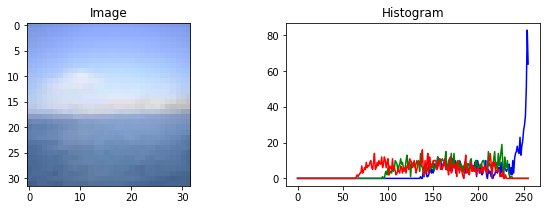

In [21]:
draw_color_histogram_from_image('adriatic_s_001807.png')

#### 1/6

1. 프로그램이 실행된다.
2. 입력된 경로의 이미지 파일을 불러온다.
3. 검색 대상 이미지들 중 불러온 이미지와 가장 비슷한 이미지 5개를 표시한다.
4. 프로그램이 종료된다.


#### 2/6
1. 프로그램이 실행된다.
2. 입력된 경로의 이미지 파일을 불러온다.
3. 검색 대상 이미지들 중 불러온 이미지와 가장 비슷한 이미지 5개를 고른다.
    - 검색 대상 이미지들을 불러온다.
    - 입력 이미지와 비교하여 유사도를 기준으로 순서를 매긴다.
    - 유사도 순서 상으로 상위 5개 이미지를 고른다.
4. 고른 이미지들을 표시한다.
5. 프로그램이 종료된다.

#### 3/6
1. 프로그램이 실행된다.
2. 입력된 경로의 이미지 파일을 불러온다.
3. 검색 대상 이미지들 중 불러온 이미지와 가장 비슷한 이미지 5개를 고른다.
    - 검색 대상 이미지들을 불러온다.
    - 입력 이미지와 비교하여 유사도를 기준으로 순서를 매긴다.
        - 입력 이미지와 검색 대상 이미지들 사이의 유사도를 계산한다.
            - 입력 이미지와 검색 대상 이미지들을 하나하나 히스토그램으로 만든다.
            - OpenCV의 compareHist() 함수를 사용하여 입력 이미지와 검색 대상 이미지 하나하나의 히스토그램 간 유사도를 계산한다.
        - 계산된 유사도를 기준으로 정렬하여 순서를 매긴다.
    - 유사도 순서 상으로 상위 5개 이미지를 고른다.
4. 고른 이미지들을 표시한다.
5. 프로그램이 종료된다.

#### 4/6
- 프로그램이 실행된다.
- build_histogram_db()
    - CIFAR-100 이미지들을 불러온다.
    - CIFAR-100 이미지들을 하나하나 히스토그램으로 만든다.
- CIFAR-100 히스토그램 중 입력된 이미지 이름에 해당하는 히스토그램을 입력 이미지로 선택한다.
- search()
    - OpenCV의 compareHist() 함수를 사용하여 입력 이미지와 검색 대상 이미지 하나하나의 히스토그램 간 유사도를 계산한다.
    - 계산된 유사도를 기준으로 정렬하여 순서를 매긴다.
    - 유사도 순서 상으로 상위 5개 이미지를 고른다.
- 고른 이미지들을 표시한다.
- 프로그램이 종료된다.

#### 5/6
- 프로그램이 실행된다.
- build_histogram_db()
    - CIFAR-100 이미지들을 불러온다.
    - CIFAR-100 이미지들을 하나하나 히스토그램으로 만든다.
    - 이미지 이름을 키로 하고, 히스토그램을 값으로 하는 딕셔너리 histogram_db를 반환한다
- CIFAR-100 히스토그램 중 입력된 이미지 이름에 해당하는 히스토그램을 입력 이미지로 선택하여 target_histogram이라는 변수명으로 지정한다.
- search()
    - 입력 이미지 히스토그램 target_histogram와 전체 검색 대상 이미지들의 히스토그램을 가진 딕셔너리 histogram_db를 입력으로 받는다.
    - OpenCV의 compareHist() 함수를 사용하여 입력 이미지와 검색 대상 이미지 하나하나의 히스토그램 간 유사도를 계산한다. 결과는 result라는 이름의 딕셔너리로, 키는 이미지 이름, 값은 유사도로 한다.
    - 계산된 유사도를 기준으로 정렬하여 순서를 매긴다.
    - 유사도 순서 상으로 상위 5개 이미지만 골라서 result에 남긴다.
- 고른 이미지들을 표시한다.
- 프로그램이 종료된다.

#### 6/6

In [23]:
def get_histogram(image):
    histogram = []

    # Create histograms per channels, in 4 bins each.
    for i in range(3):
        channel_histogram = cv2.calcHist(images=[image],
                                         channels=[i],
                                         mask=None,
                                         histSize=[4],  # 히스토그램 구간을 4개로 한다.
                                         ranges=[0, 256])
        histogram.append(channel_histogram)  

    histogram = np.concatenate(histogram)
    histogram = cv2.normalize(histogram, histogram)

    return histogram

In [24]:
# get_histogram() 확인용 코드
filename = train[b'filenames'][0].decode()
file_path = os.path.join(images_dir_path, filename)
image = cv2.imread(file_path)
histogram = get_histogram(image)
histogram

array([[0.3126804 ],
       [0.4080744 ],
       [0.14521089],
       [0.21940625],
       [0.18654831],
       [0.23742512],
       [0.30208108],
       [0.35931748],
       [0.06465594],
       [0.35825753],
       [0.36991683],
       [0.29254165]], dtype=float32)

In [25]:
def build_histogram_db():
    histogram_db = {}

    #디렉토리에 모아 둔 이미지 파일들을 전부 리스트업합니다. 
    path = images_dir_path
    file_list = os.listdir(images_dir_path)

    for file_name in tqdm(file_list):
        file_path = os.path.join(images_dir_path, file_name)
        image = cv2.imread(file_path)

        histogram = get_histogram(image)

        histogram_db[file_name] = histogram

    return histogram_db

In [26]:
histogram_db = build_histogram_db()
histogram_db['adriatic_s_001807.png']

100%|██████████| 49999/49999 [00:04<00:00, 12284.74it/s]


array([[0.        ],
       [0.        ],
       [0.29744893],
       [0.5828624 ],
       [0.        ],
       [0.17107612],
       [0.41608465],
       [0.29315054],
       [0.        ],
       [0.34301192],
       [0.37224102],
       [0.16505837]], dtype=float32)

In [27]:
def get_target_histogram():
    filename = input("이미지 파일명을 입력하세요: ")
    if filename not in histogram_db:
        print('유효하지 않은 이미지 파일명입니다.')
        return None
    return histogram_db[filename]

In [34]:
target_histogram = get_target_histogram()
target_histogram

이미지 파일명을 입력하세요: cat
유효하지 않은 이미지 파일명입니다.


In [29]:
def search(histogram_db, target_histogram, top_k=5):
    results = {}

    # Calculate similarity distance by comparing histograms.
    for file_name, histogram in tqdm(histogram_db.items()):
        distance = cv2.compareHist(H1=target_histogram,
                                   H2=histogram,
                                   method=cv2.HISTCMP_CHISQR)

        results[file_name] = distance

    results = dict(sorted(results.items(), key=lambda item: item[1])[:top_k])

    return results

In [ ]:
result = search(histogram_db, target_histogram)
result

In [31]:
def show_result(result):
    f=plt.figure(figsize=(10,3))
    for idx, filename in enumerate(result.keys()):    
        img_path = os.path.join(images_dir_path, filename)
        im = f.add_subplot(1,len(result),idx+1)
        img = Image.open(img_path)
        im.imshow(img)

In [ ]:
show_result(result)

In [ ]:
target_histogram = get_target_histogram()
result = search(histogram_db, target_histogram)
show_result(result)